In [39]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import linear_model

\
**Logistic Function**

In [52]:
z = np.arange(-7, 7, 0.1)

In [53]:
phiz = 1.0 / (1.0 + np.exp(-z))

Text(0, 0.5, '$\\phi (z)$')

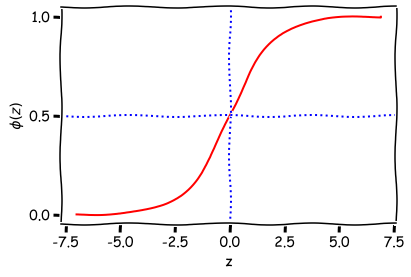

In [54]:
plt.xkcd()  # Kartoon
plt.plot(z, phiz, color='r')

plt.axvline(0, ls='dotted', color='b')
plt.axhline(y=0.5, ls='dotted', color='b')
plt.yticks([0, 0.5, 1])
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

\
**Example 1: iris**

In [40]:
xtrain = np.array([10,12,14,15,30,35,40,65]).reshape(-1,1)
xtrain

array([[10],
       [12],
       [14],
       [15],
       [30],
       [35],
       [40],
       [65]])

In [41]:
ytrain = (xtrain >20 )
ytrain

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [42]:
model = linear_model.LogisticRegression(C=1000)      # regularization is applied by default

In [43]:
#C : float, optional (default=1.0)
# Inverse of regularization strength; must be a positive float.
# smaller values specify stronger regularization.

In [44]:
model.fit(xtrain, np.ravel(ytrain))

LogisticRegression(C=1000)

In [45]:
model.intercept_

array([-26.95768605])

In [46]:
model.coef_

array([[1.19837114]])

In [47]:
#teta= [ intercept   coef  ]

In [48]:
### predict
xtest = np.array([8,13,32,36,65])

In [49]:
t = model.coef_ * xtest  + model.intercept_      #t = teta_t_x
t

array([[-17.37071694, -11.37886124,  11.39019041,  16.18367496,
         50.936438  ]])

In [50]:
ypred = 1 / (1 + np.exp(-t))
ypred = ypred.reshape(-1,1)
ypred

array([[2.85754761e-08],
       [1.14345318e-05],
       [9.99988694e-01],
       [9.99999906e-01],
       [1.00000000e+00]])

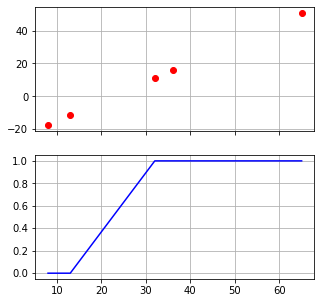

In [51]:
fig = plt.figure(figsize=(5, 5))
ax = fig.subplots(2, 1, sharex=True)

ax[0].scatter(xtest, np.ravel(t), color='r')
ax[0].grid()
ax[1].plot(xtest, np.ravel(ypred), color='b')
ax[1].grid()

\
**Example 2: iris**

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [0,2]]
y = iris.target
X.shape

(150, 2)

In [5]:
model = LogisticRegression(random_state=1, solver='newton-cg' , multi_class='multinomial')
model.fit(X, y);

In [8]:
from mlxtend.plotting import plot_decision_regions

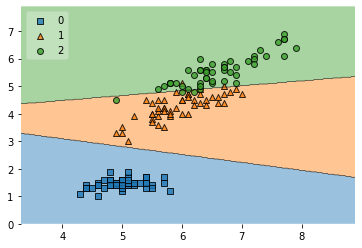

In [9]:
plot_decision_regions(X, y, clf = model , legend=2 );

\
**Example 3 : moon**

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

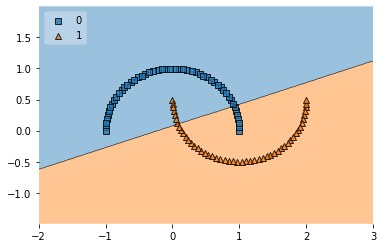

In [11]:
model = LogisticRegression(solver='lbfgs' ,random_state=1)
model.fit(X, y);
plot_decision_regions(X, y, clf = model , legend=2 );

\
**Example 4: circle**

In [12]:
from sklearn.datasets import make_circles

In [13]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

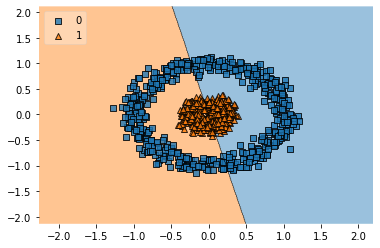

In [14]:
model = LogisticRegression(solver='lbfgs' ,random_state=1)
model.fit(X, y);
plot_decision_regions(X, y, clf = model , legend=2 );

\
**Example 5 :  xor**

In [31]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

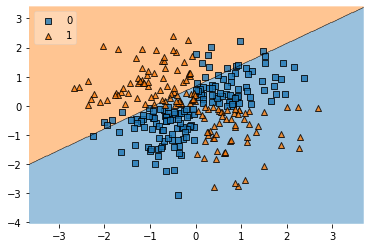

In [32]:
model = LogisticRegression(solver='lbfgs' ,random_state=1)
model.fit(X, y);
plot_decision_regions(X, y, clf=model , legend=2 );